In [1]:
from google.colab import drive
drive.mount('/drive', force_remount = True)

Mounted at /drive


In [14]:
#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=3a5f96ff9bca85ee9ed381d323272afd794ce207b26c89d6de4f760f44c94381
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [4]:
# Load the data file as Toronto homeless population report

df = pd.read_excel('/drive/MyDrive/Colab Notebooks/INF2178_A2_data.xlsx')

In [6]:
df

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [7]:
df.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


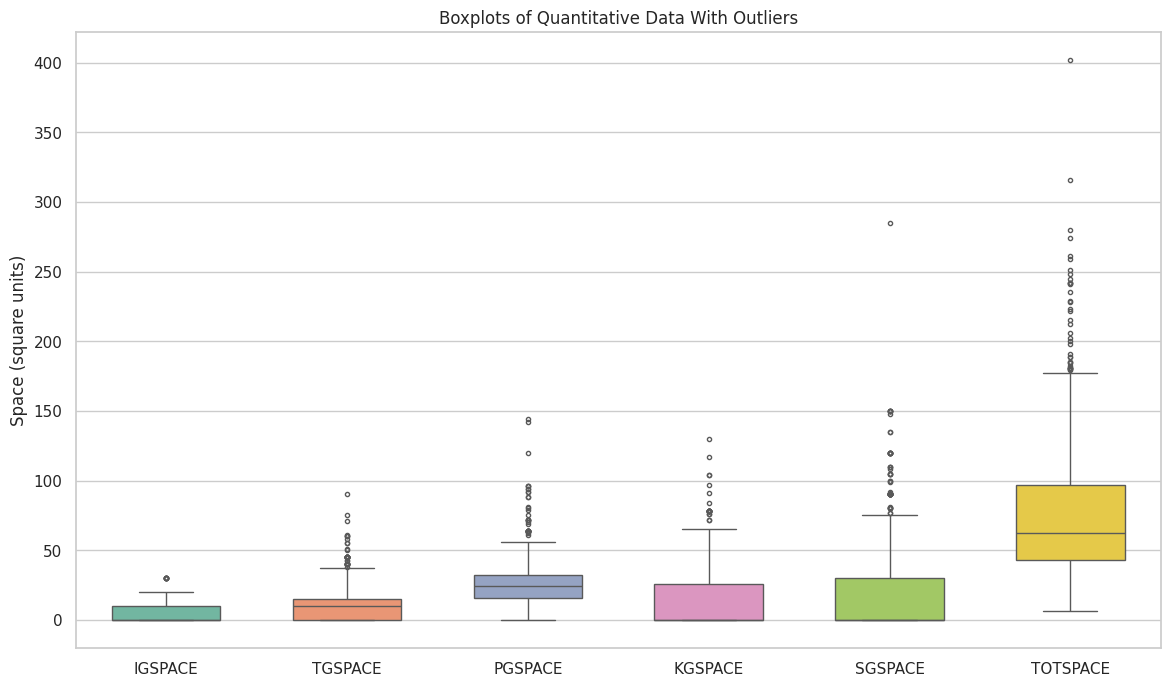

In [13]:
# Make every Space a column
quantitative_columns = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']

# Creating a boxplot for each column
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df[quantitative_columns], orient="v", palette="Set2", width=0.6, fliersize=3)
plt.title('Boxplots of Quantitative Data With Outliers')
plt.ylabel('Space (square units)')
plt.show()

In [9]:
avg_space_by_subsidy = df.groupby('subsidy')['TOTSPACE'].mean()

# Convert "AUSPICE" column to boolean values
df['non_profit'] = df['AUSPICE'] == 'Non Profit Agency'

# Group by "non_profit" and calculate average total space
avg_space_by_auspice = df.groupby('non_profit')['TOTSPACE'].mean()

print("Average Total Space by Subsidy:")
print(avg_space_by_subsidy)

print("\nAverage Total Space by Auspice (Non-Profit vs. Other Agency):")
print(avg_space_by_auspice)

Average Total Space by Subsidy:
subsidy
N    57.933333
Y    84.199164
Name: TOTSPACE, dtype: float64

Average Total Space by Auspice (Non-Profit vs. Other Agency):
non_profit
False    63.119444
True     82.103841
Name: TOTSPACE, dtype: float64


In [43]:
# Ordinary Least Squares (OLS) model for subsidy difference
model_fee_subsidy = ols('TOTSPACE ~ C(subsidy)', data=df).fit()
anova_table_fee_subsidy = sm.stats.anova_lm(model_fee_subsidy, typ=2)

# ANOVA table
res1 = stat()
res1.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(subsidy)')
res1.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,1.607654e+05,160765.392950,75.227653,1.550892e-17
Residual,1061.0,2.267412e+06,2137.051825,NaN,NaN


In [44]:
#post hoc test using Scheffe's test or Tukey's HSD
res1 = stat()
res1.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
res1.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.784715,43.457641,10.147115,0.001


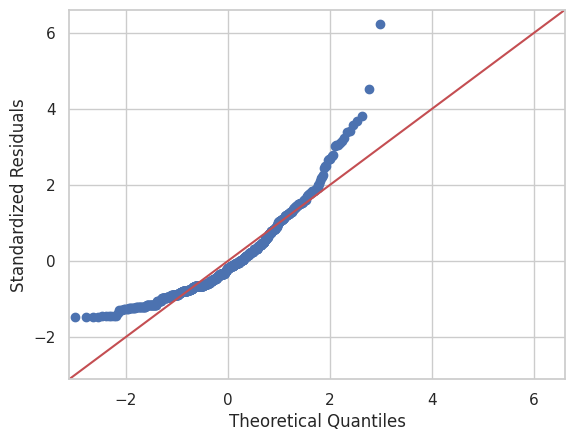

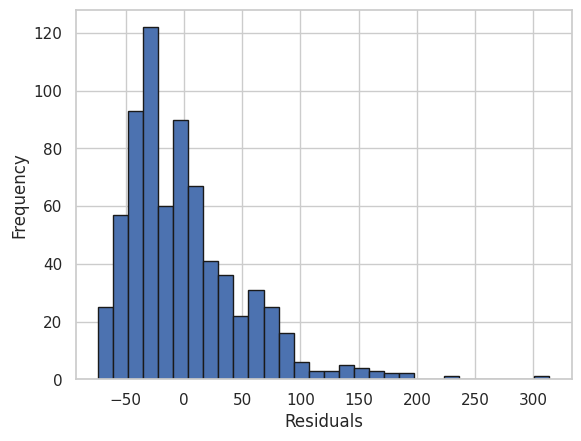

In [45]:

#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res1.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [46]:

#assumption 1: residuals are normally distributed: Shapiro Wilk test for subsidy
w, pvalue = stats.shapiro(model_fee_subsidy.resid)
print(w,pvalue)

0.8925794959068298 1.4240603342711214e-26


In [55]:

#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res1.levene(df=df, res_var='TOTSPACE', xfac_var='subsidy')
res1.levene_summary

,Parameter,Value
0,Test statistics (W),20.4178
1,Degrees of freedom (Df),1.0000
2,p value,0.0000


In [48]:
# Ordinary Least Squares (OLS) model for non profit
model_non_profit = ols('TOTSPACE ~ C(non_profit)', data=df).fit()
anova_table_fee_subsidy = sm.stats.anova_lm(model_fee_subsidy, typ=2)

# ANOVA table
res2 = stat()
res2.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(non_profit)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(non_profit),1.0,8.580610e+04,85806.095597,38.866711,6.538175e-10
Residual,1061.0,2.342371e+06,2207.701492,NaN,NaN


In [49]:
#post hoc test using Scheffe's test or Tukey's HSD
res2 = stat()
res2.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='non_profit', anova_model='TOTSPACE ~ C(non_profit)')
res2.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,True,False,19.905966,9.939864,29.872068,5.545732,0.001


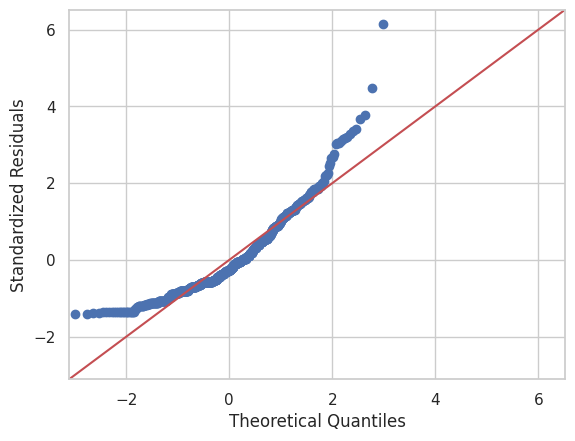

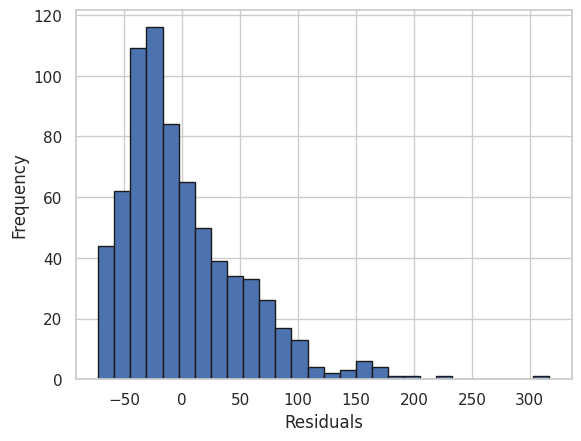

In [51]:

#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res2.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res2.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [53]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test for non-profit
w, pvalue = stats.shapiro(model_non_profit.resid)
print(w,pvalue)

0.8998456001281738 9.011041640096581e-26


In [54]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed for non-profit
res2.levene(df=df, res_var='TOTSPACE', xfac_var='non_profit')
res1.levene_summary

,Parameter,Value
0,Test statistics (W),14.9910
1,Degrees of freedom (Df),1.0000
2,p value,0.0001


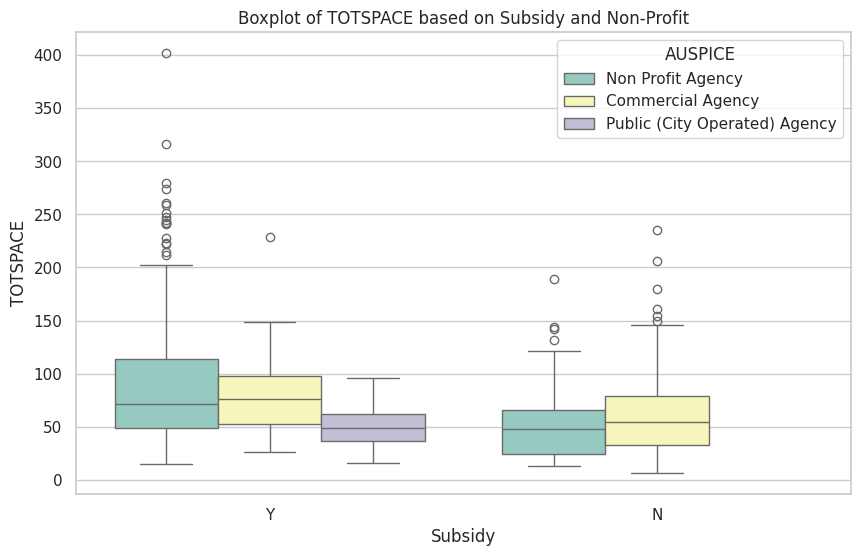

In [57]:
# Create a boxplot for subsidy and AUSPICE
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x="subsidy", y="TOTSPACE", hue="AUSPICE", data=df, palette="Set3")
boxplot.set(xlabel="Subsidy", ylabel="TOTSPACE", title="Boxplot of TOTSPACE based on Subsidy and Non-Profit")
plt.show()

In [58]:
# Two-way ANOVA
model_twoway = ols('TOTSPACE ~ C(subsidy) * C(AUSPICE)', data=df).fit()
anova_table_twoway = sm.stats.anova_lm(model_twoway, typ=2)
anova_table_twoway

,sum_sq,df,F,PR(>F)
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE),8.568144e+03,2.0,2.057622,1.282684e-01
C(subsidy):C(AUSPICE),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [63]:
# Perform ANOVA analysis using the dependent variable 'TOTSPACE'
# The ANOVA model includes main effects of 'AUSPICE' and 'subsidy', as well as their interaction
res3 = stat()
res3.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res3.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


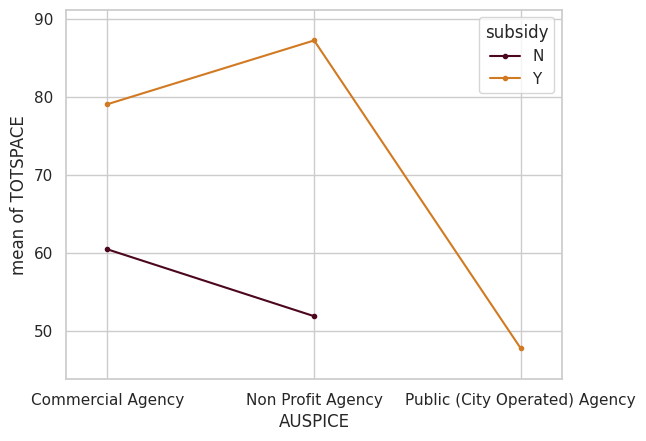

In [65]:
# plot an interaction plot for subsidy and non-profit
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['AUSPICE'],trace=df['subsidy'],response=df['TOTSPACE'],colors=['#4c061d','#d17a22',])
plt.show()

In [66]:
# Perform Tukey HSD test for post hoc comparisons with different agency
res3.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res3.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,4.406270,29.206805,4.501830,0.004333
1,Non Profit Agency,Public (City Operated) Agency,36.177966,9.559488,62.796444,4.514429,0.004205
2,Commercial Agency,Public (City Operated) Agency,19.371429,-9.191627,47.934484,2.252677,0.249650


In [67]:
# Perform Tukey HSD test for post hoc comparisons with different subsidy
res3.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res3.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.873006,43.36935,10.244062,0.001


In [68]:
# Perform Tukey HSD test for post hoc comparisons with different agency and subsidy.
res3.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res3.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
